# Part 1: Gradient Descent

In this lab we will implement some of the optimisation methods we learned in the lecture. First, we will start by revisiting gradient descent for linear regression. However, in this implementation we will observe how the model parameters are updated over iterations of the gradient descent algorithm. 

Let's start by implementing gradient descent on a simple linear regression dataset, like the one you generated in Lab 1, but this time shifted so that it ranges from -5 to 5.

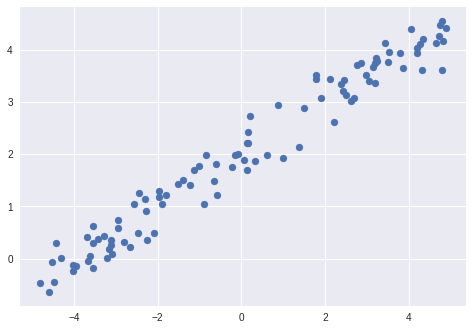

In [0]:
import torch
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 100
theta_true = torch.Tensor([[0.5], [2]]) #2*1

X = 10 * torch.rand(M, 2) - 5  # 100*2 [0,1)uniform distribution
X[:, 1] = 1.0  # the 2nd column

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)  #100*1

## visualise the data by plotting it
# YOUR CODE HERE
# raise NotImplementedError()

plt.scatter(X[:,0].numpy(), y.numpy())
plt.show()

You should now have data points according to y = mx + b where m = theta_true[0,0] and b = theta_true[1,0]. Note, $m = \theta_1$ and $b = \theta_0$.

Now, let's implement gradient descent using the Mean Squared Error (MSE) cost function. 

Recall that: 

$J(\theta) = \frac{1}{2 M} \sum_{i = 1}^M (h_{\theta} (x^{(i)}) - y^{(i)} )^2$

for $i = 1 \text{  to iters (or until convergence)}$ <br>

$\hspace{1cm} w_i \leftarrow w_i - \eta \frac{\partial J}{\partial w_i}$

Implement the functions below in order to plot the cost function as well as the weight updates over iterations of gradient descent.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## hypothesis computes $h_theta$
'''
p=2,n=100
theta:p*1
X:n*p
h_theta:n*1
'''
def hypothesis(theta, X):
    # YOUR CODE HERE
#     raise NotImplementedError()
    h_theta = torch.mm(X,theta)
    return h_theta

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
'''
theta:p*1
X:n*p
y:n*1
grad:p*1
'''
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
#     raise NotImplementedError()
    n, p = X.shape
    grad = 0.5 * (2/n) * X.t() @ (hypothesis(theta, X)-y)
    return grad

## cost_func computes the cost function J
'''
theta:p*1 or p*m
X:n*p
y:n*1
J:1*1 or 1*m
'''
def cost_func(theta, X, y): 
    # YOUR CODE HERE
#     raise NotImplementedError()
    n,p = X.shape
    J = 0.5/n * torch.sum(torch.pow(2, (hypothesis(theta, X)-y)),dim=0)
#     J= 0.5/n  * ((hypothesis(theta, X)-y)**2).sum(0)
#     J = 0.5 * torch.mean(torch.pow(2, (hypothesis(theta, X)-y)))
#     J = J.unsqueeze_(0)
    return J

Now let's plot the updates to see what is happening as we iterate over the algorithm. First, we will plot $J$ as a function of $\theta_1$ as well as the resulting equation of the line learned over $N=5$ iterations. Once your code is working, modify the value of $\eta$ to see how it affects convergence.

The figure below illustrates what you're aiming to plot. Note, much of the code to generate the figures is given below, you mostly need to complete the 3 functions above and then fill in a few missing lines of code below.

<img src="http://comp6248.ecs.soton.ac.uk/labs/lab3/Figure1.png">

### First generate the figure on the left hand side. This plot shows the data and the linear fit of the data as the model parameters change over the 5 iterations.

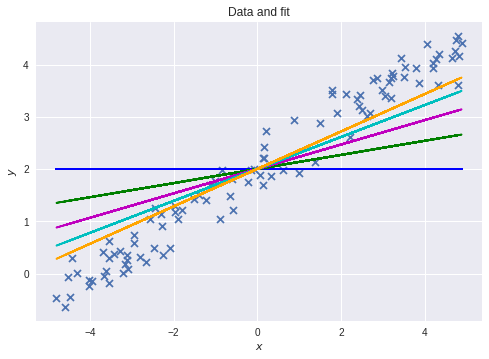

In [0]:
## Now we can plot the lines over iterations
## To do this, we start by constructing a grid of parameter pairs and their corresponding cost function values. 
x_axis = np.linspace(-1,1,100)
theta_grid = torch.Tensor(len(x_axis),2) #100*2
theta_grid[:,0] = torch.from_numpy(x_axis) #the 1st column
theta_grid[:,1] = 2.0  #the 2nd column

J_grid = cost_func(theta_grid.t(), X, y)  #2*100,100*2,100*1 J_grid:100

N = 5
eta = 0.03

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise #2*1
J_t = torch.Tensor(1,N)  #1*N
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]  #scalar
theta[:,:,0] = theta_0  #2*1

for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
    # YOUR CODE HERE
#     raise NotImplementedError()
#     row_size=theta_grid.shape[0]  #100
#     this_theta = theta_grid[row_size-1-5*(N-1-j),:].unsqueeze_(0).t() #2*1
#     this_theta = theta_grid[(int)(row_size/2+5*j),:].unsqueeze_(0).t() #2*1
    grad=grad_cost_func(last_theta , X, y)
    this_theta = last_theta - eta * grad
    theta[:,:,j] = this_theta
    J_t[:,j] = cost_func(this_theta,X,y)[0]
    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
# raise NotImplementedError()
plt.scatter(X[:,0].numpy(), y.numpy(),marker='x')
for j in range(0,N):
    plt.plot(X[:,0].numpy(),hypothesis(theta[:,:,j], X).numpy(),colors[j])

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')
plt.show()

### Next, generate the plots on the right hand side. This figure is a plot of the cost function over the value of $\theta_1$ as well as the updates of $\theta_1$ over iterations.

Text(0.5, 1.0, 'Cost function')

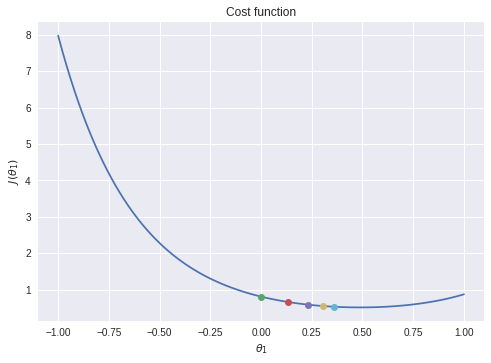

In [0]:
# YOUR CODE HERE
# raise NotImplementedError()
# J = torch.Tensor(1,theta_grid.shape[0])  
# for i in range(theta_grid.shape[0]):
#     theta_c=theta_grid[i,:].unsqueeze_(0).t()
#     J[0,i]=cost_func(theta_c,X,y)[0]
# plt.plot(theta_grid[:,0].numpy(),J.t().numpy())
plt.plot(theta_grid[:,0].numpy(),J_grid.numpy())

for j in range(0,N):
    plt.plot(theta[:,:,j][0].numpy(),J_t[:,j].numpy(),'o')

# add the plot axes labels and title
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')

###$\eta$=0.003

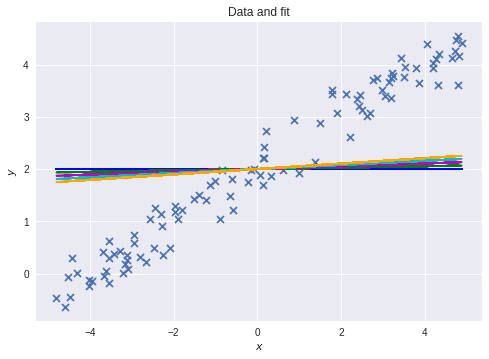

Text(0.5, 1.0, 'Cost function')

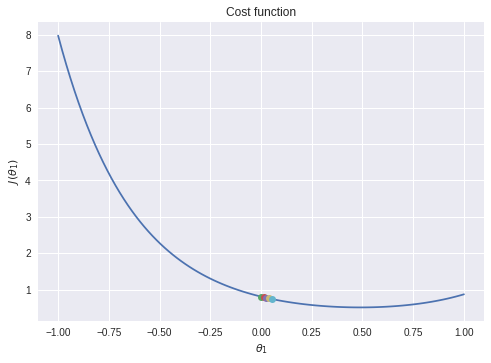

In [0]:
eta = 0.003

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise #2*1
J_t = torch.Tensor(1,N)  #1*N
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]  #scalar
theta[:,:,0] = theta_0  #2*1

for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
    # YOUR CODE HERE
#     raise NotImplementedError()
    row_size=theta_grid.shape[0]  #100
    grad=grad_cost_func(last_theta , X, y)
    this_theta = last_theta - eta * grad
    theta[:,:,j] = this_theta
    J_t[:,j] = cost_func(this_theta,X,y)[0]
    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
# raise NotImplementedError()
plt.scatter(X[:,0].numpy(), y.numpy(),marker='x')
for j in range(0,N):
    plt.plot(X[:,0].numpy(),hypothesis(theta[:,:,j], X).numpy(),colors[j])

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')
plt.show()

J = torch.Tensor(1,theta_grid.shape[0])  
for i in range(theta_grid.shape[0]):
    theta_c=theta_grid[i,:].unsqueeze_(0).t()
    J[0,i]=cost_func(theta_c,X,y)[0]
plt.plot(theta_grid[:,0].numpy(),J.t().numpy())

for j in range(0,N):
    plt.plot(theta[:,:,j][0].numpy(),J_t[:,j].numpy(),'o')

# add the plot axes labels and title
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')

###$\eta$=0.1

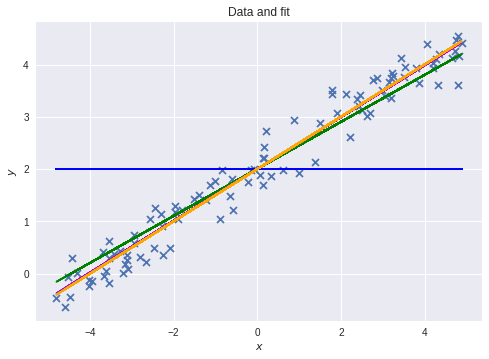

Text(0.5, 1.0, 'Cost function')

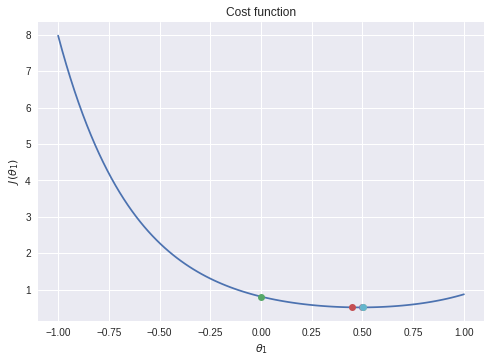

In [0]:
eta = 0.1

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise #2*1
J_t = torch.Tensor(1,N)  #1*N
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]  #scalar
theta[:,:,0] = theta_0  #2*1

for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
    # YOUR CODE HERE
#     raise NotImplementedError()
    row_size=theta_grid.shape[0]  #100
    grad=grad_cost_func(last_theta , X, y)
    this_theta = last_theta - eta * grad
    theta[:,:,j] = this_theta
    J_t[:,j] = cost_func(this_theta,X,y)[0]
    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
# raise NotImplementedError()
plt.scatter(X[:,0].numpy(), y.numpy(),marker='x')
for j in range(0,N):
    plt.plot(X[:,0].numpy(),hypothesis(theta[:,:,j], X).numpy(),colors[j])

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')
plt.show()

J = torch.Tensor(1,theta_grid.shape[0])  
for i in range(theta_grid.shape[0]):
    theta_c=theta_grid[i,:].unsqueeze_(0).t()
    J[0,i]=cost_func(theta_c,X,y)[0]
plt.plot(theta_grid[:,0].numpy(),J.t().numpy())

for j in range(0,N):
    plt.plot(theta[:,:,j][0].numpy(),J_t[:,j].numpy(),'o')

# add the plot axes labels and title
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')

###$\eta$=1

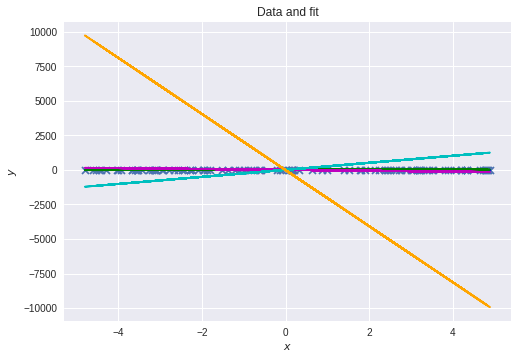

Text(0.5, 1.0, 'Cost function')

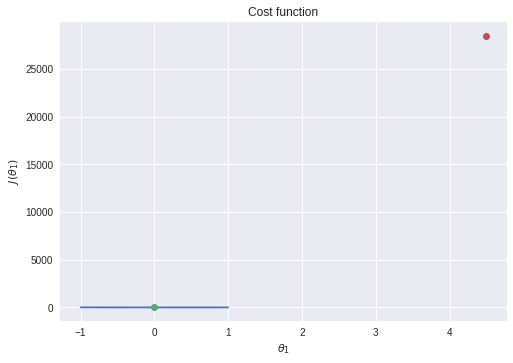

In [0]:
eta = 1

theta_0 = torch.Tensor([[0.0], [2.0]]) #initialise #2*1
J_t = torch.Tensor(1,N)  #1*N
theta = torch.Tensor(2,1,N)
J_t[:,0] = cost_func(theta_0, X, y)[0]  #scalar
theta[:,:,0] = theta_0  #2*1

for j in range(1,N):
    last_theta = theta[:,:,j-1]
    ## Compute the value of this_theta
    # YOUR CODE HERE
#     raise NotImplementedError()
    row_size=theta_grid.shape[0]  #100
    grad=grad_cost_func(last_theta , X, y)
    this_theta = last_theta - eta * grad
    theta[:,:,j] = this_theta
    J_t[:,j] = cost_func(this_theta,X,y)[0]
    
colors = ['b', 'g', 'm', 'c', 'orange']

## Plot the data 
# YOUR CODE HERE
# raise NotImplementedError()
plt.scatter(X[:,0].numpy(), y.numpy(),marker='x')
for j in range(0,N):
    plt.plot(X[:,0].numpy(),hypothesis(theta[:,:,j], X).numpy(),colors[j])

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')
plt.show()

J = torch.Tensor(1,theta_grid.shape[0])  
for i in range(theta_grid.shape[0]):
    theta_c=theta_grid[i,:].unsqueeze_(0).t()
    J[0,i]=cost_func(theta_c,X,y)[0]
plt.plot(theta_grid[:,0].numpy(),J.t().numpy())

for j in range(0,N):
    plt.plot(theta[:,:,j][0].numpy(),J_t[:,j].numpy(),'o')

# add the plot axes labels and title
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Cost function')

**Answer: From the above figures, when $\eta$  lowers, the change of the $\theta$ is small, therefore the change of the cost is small, the speed of convergence is small. On the other hand, when $\eta$  increases, it is possible that the cost function is harder to converge.**

### Finally, generate a contour plot of the cost function

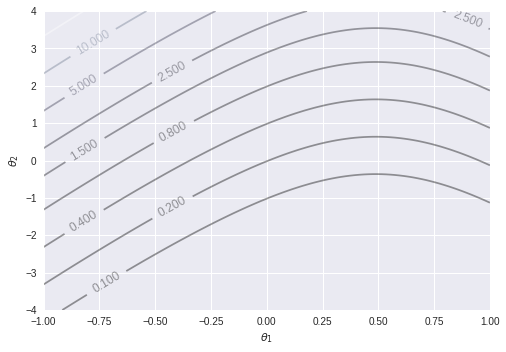

In [0]:
## Generate a grid of values for theta_0 and theta_1 and compute the cost function for every combination.
theta_0_vals = np.linspace(-1.0,1,100)
theta_1_vals = np.linspace(-4.0,4,100)
theta = torch.Tensor(len(theta_0_vals),2) #100*2

# Compute the cost function over every combination of values for theta in a variable called J which will then be plot below
# YOUR CODE HERE
# raise NotImplementedError()
J = torch.Tensor(theta.shape[0],theta.shape[0])  #100*100
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)  #100*100
for(i,j), v in np.ndenumerate(J):
    theta_1=torch.Tensor([[xc[i,j]],[yc[i,j]]])  #2*1
    J[i,j]= cost_func(theta_1, X, y)[0]

# contours = plt.contour(xc, yc, J, 20, alpha=.4,cmap=plt.cm.bone)
contours = plt.contour(xc, yc, J, levels=[0.1,.2,.4,0.8,1.5, 2.5, 5, 10,20], alpha=.4,cmap=plt.cm.bone)
plt.clabel(contours)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.show()

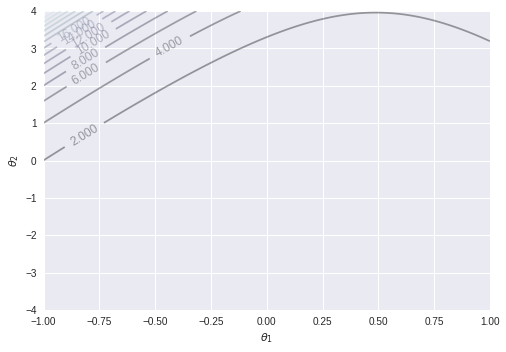

In [0]:
## Generate a grid of values for theta_0 and theta_1 and compute the cost function for every combination.
theta_0_vals = np.linspace(-1.0,1,100)
theta_1_vals = np.linspace(-4.0,4,100)
theta = torch.Tensor(len(theta_0_vals),2) #100*2
# Compute the cost function over every combination of values for theta in a variable called J which will then be plot below
# YOUR CODE HERE
# raise NotImplementedError()
J = torch.Tensor(theta.shape[0],theta.shape[0])  #100*100
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)  #100*100
for(i,j), v in np.ndenumerate(J):
    if(j<100):
       theta[j,:]=torch.Tensor([[xc[i,j],yc[i,j]]])  #1*2
       if(j==99):
          J[i,:]=torch.Tensor(cost_func(theta.t(), X, y)) #2*100,100*2,100*1 J:100
         
contours = plt.contour(xc, yc, J, 20, alpha=.4,cmap=plt.cm.bone)
plt.clabel(contours)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.show()